In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import bisect 


from datetime import datetime
from printdescribe import changepath

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.tsa.stattools import kpss,adfuller

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
drivers = [item for item in pyodbc.drivers()]
driver = drivers[-1]
print("driver:{}".format(driver))

driver:Microsoft Access Text Driver (*.txt, *.csv)


In [3]:
# path1 = r"C:\Users\HP\Downloads"
# with changepath(path1):
#     data = pd.read_csv("spy_vix.csv")
cnxn = pyodbc.connect('Trusted_Connection=yes', 
                     driver = '{ODBC Driver 17 for SQL Server}',
                     server = '.', 
                     database = 'TickHistory')

In [4]:
cursor = cnxn.cursor()
query = '''select Spy.Date_Time, SPY.Volume [SPY_Volume],
SPY.Last [SPY_Last], VIX.Last [VIX_Last]
FROM [TickHistory].[dbo].[raw_SPY_VIX_2019_2020] Spy
INNER JOIN [TickHistory].[dbo].[raw_SPY_VIX_2019_2020] Vix
ON Spy.Date_Time = Vix.Date_Time
AND Vix.RIC = '.VIX'
where Spy.RIC = 'SPY' 
and Spy.[Open] is not null
ORDER BY Spy.Date_Time'''
# query = '''select top 10 * from raw_SPY_VIX_2019_2020'''
# cursor.execute()
data = pd.read_sql(query, cnxn)
# cnxn.commit()
cursor.close()
data.tail(5)

,Date_Time,SPY_Volume,SPY_Last,VIX_Last
617355,2020-12-31T20:58:51.000000000Z,17587,374.26,22.64
617356,2020-12-31T20:59:06.000000000Z,110402,374.43,22.59
617357,2020-12-31T20:59:21.000000000Z,49541,374.32,22.56
617358,2020-12-31T20:59:36.000000000Z,44823,374.32,22.62
617359,2020-12-31T20:59:51.000000000Z,201248,374.63,22.51


In [5]:
df = data

In [6]:
df['TimeIndex']= df['Date_Time'].apply(lambda t:datetime.strptime(t[:-11], "%Y-%m-%dT%H:%M:%S"))

In [7]:
df.set_index("TimeIndex", inplace=True)

In [8]:
df = df[['SPY_Last','VIX_Last']]

In [9]:
df = df.astype('float64')

In [10]:
df = df.dropna()

In [66]:
df_train = df[:int(len(df)*0.8)]
df_test = df[int(len(df)*0.8):]

In [70]:
# Difference the datasets twice
df_train_fd = df_train.diff().dropna()
df_test_fd = df_test.diff().dropna()
df_train_sd = df_train_fd.diff().dropna()
df_test_sd = df_test_fd.diff().dropna()

In [74]:
'''LOOKIE LOOKIE'''
var_1 = VAR(df_train_sd)
var_1_fitted = var_model.fit(1, trend='nc')# Fit the model
print(var_1_fitted.summary())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 14, Apr, 2021
Time:                     21:43:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.57408
Nobs:                     617357.    HQIC:                  -8.57413
Log likelihood:           894677.    FPE:                0.000188927
AIC:                     -8.57415    Det(Omega_mle):     0.000188925
--------------------------------------------------------------------
Results for equation SPY_Last
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
L1.SPY_Last        -0.478858         0.001169         -409.474           0.000
L1.VIX_Last         0.094456         0.001900           49.718           0.000

Results for equation VIX_Last
                 coefficient      

In [75]:
'''LOOKIE LOOKIE'''
var_2 = VAR(df_train_sd)
var_2_fitted = var_model.fit(2, trend='nc')# Fit the model
print(var_2_fitted.summary())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 14, Apr, 2021
Time:                     21:44:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.85860
Nobs:                     617356.    HQIC:                  -8.85870
Log likelihood:           982527.    FPE:                0.000142134
AIC:                     -8.85874    Det(Omega_mle):     0.000142132
--------------------------------------------------------------------
Results for equation SPY_Last
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
L1.SPY_Last        -0.651383         0.001306         -498.906           0.000
L1.VIX_Last         0.065787         0.002165           30.393           0.000
L2.SPY_Last        -0.309735         0.001321         -234.394   

In [76]:
'''LOOKIE LOOKIE'''
var_3 = VAR(df_train_sd)
var_3_fitted = var_model.fit(3, trend='nc')# Fit the model
print(var_3_fitted.summary())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 14, Apr, 2021
Time:                     21:44:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.99322
Nobs:                     617355.    HQIC:                  -8.99338
Log likelihood:       1.02411e+06    FPE:                0.000124222
AIC:                     -8.99344    Det(Omega_mle):     0.000124219
--------------------------------------------------------------------
Results for equation SPY_Last
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
L1.SPY_Last        -0.734418         0.001359         -540.404           0.000
L1.VIX_Last         0.052852         0.002284           23.136           0.000
L2.SPY_Last        -0.471988         0.001636         -288.481   

### PREDICTION

In [85]:
df_train_lagged = df_train_sd.shift(1).dropna()
df_train_lagged_2 = df_train_sd.shift(2).dropna()
df_train_lagged_3 = df_train_sd.shift(3).dropna()

In [86]:
df_test_lagged = df_test_sd.shift(1).dropna()
df_test_lagged_2 = df_test_sd.shift(2).dropna()
df_test_lagged_3 = df_test_sd.shift(3).dropna()

In [87]:
predicted_train_1 = var_1_fitted.coefs[0][0][0]*df_train_lagged['SPY_Last'] +\
var_1_fitted.coefs[0][0][1]*df_train_lagged['VIX_Last']

In [88]:
predicted_train_2 = var_2_fitted.coefs[0][0][0]*df_train_lagged['SPY_Last'] +\
var_2_fitted.coefs[0][0][1]*df_train_lagged['VIX_Last'] +\
var_2_fitted.coefs[1][0][0]*df_train_lagged_2['SPY_Last'] +\
var_2_fitted.coefs[1][0][1]*df_train_lagged_2['VIX_Last']

In [89]:
predicted_train_3 = var_3_fitted.coefs[0][0][0]*df_train_lagged['SPY_Last'] +\
var_3_fitted.coefs[0][0][1]*df_train_lagged['VIX_Last'] +\
var_3_fitted.coefs[1][0][0]*df_train_lagged_2['SPY_Last'] +\
var_3_fitted.coefs[1][0][1]*df_train_lagged_2['VIX_Last'] +\
var_3_fitted.coefs[2][0][0]*df_train_lagged_3['SPY_Last'] +\
var_3_fitted.coefs[2][0][1]*df_train_lagged_3['VIX_Last'] 

In [92]:
predicted_train_undiff = 2*df_train['SPY_Last'].shift(1) - df_train['SPY_Last'].shift(2) + predicted_train_1

In [100]:
predicted_train_undiff.dropna(inplace=True)

In [101]:
df_delta_1 = predicted_train_undiff-df_train['SPY_Last'][3:]

In [102]:
predicted_train_undiff.head(5)

TimeIndex
2019-01-02 14:31:49    246.498254
2019-01-02 14:32:04    246.634812
2019-01-02 14:32:19    246.477145
2019-01-02 14:32:34    246.299929
2019-01-02 14:32:49    246.444327
dtype: float64

In [103]:
df_train['SPY_Last'][3:].head(5)

TimeIndex
2019-01-02 14:31:49    246.5511
2019-01-02 14:32:04    246.4700
2019-01-02 14:32:19    246.3800
2019-01-02 14:32:34    246.4500
2019-01-02 14:32:49    246.3900
Name: SPY_Last, dtype: float64

In [104]:
df_delta_1

TimeIndex
2019-01-02 14:31:49   -0.052846
2019-01-02 14:32:04    0.164812
2019-01-02 14:32:19    0.097145
2019-01-02 14:32:34   -0.150071
2019-01-02 14:32:49    0.054327
                         ...   
2020-08-18 13:40:49    0.006566
2020-08-18 13:41:04   -0.048319
2020-08-18 13:41:34    0.011862
2020-08-18 13:41:49    0.003291
2020-08-18 13:42:04   -0.022899
Length: 493885, dtype: float64

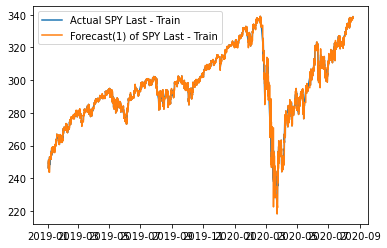

In [105]:
plt.plot(df_train['SPY_Last'], label='Actual SPY Last - Train')
plt.plot(predicted_train_undiff, label='Forecast(1) of SPY Last - Train')
# plt.plot(df_delta_1, label='Delta')
plt.legend()

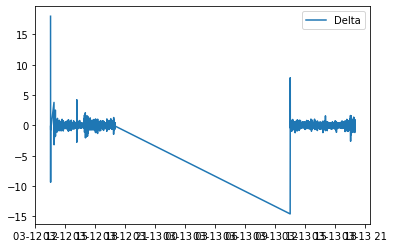

In [112]:
plt.plot(df_delta_1['2020-03-12':'2020-03-15'], label='Delta')
plt.legend()

In [114]:
df_delta_1['2020-03-12':'2020-03-15'].describe()

count    3047.000000
mean       -0.000050
std         0.654473
min       -14.580239
25%        -0.219574
50%        -0.007175
75%         0.212645
max        17.980527
dtype: float64

In [121]:
np.abs(df_delta_1).describe()

count    493885.000000
mean          0.067794
std           0.146961
min           0.000000
25%           0.016989
50%           0.038957
75%           0.079138
max          31.768029
dtype: float64

In [117]:
df_train_fd['2020-03-12':'2020-03-15'].to_csv('delta_train_fd.csv')

In [118]:
df_train_sd['2020-03-12':'2020-03-15'].to_csv('delta_train_sd.csv')

In [119]:
df_train['2020-03-11':'2020-03-15'].to_csv('train.csv')

### ARIMA

In [123]:
from statsmodels.tsa.arima.model import ARIMA

In [131]:
arima_1 = ARIMA(df_train_sd['SPY_Last'], df_train_sd['VIX_Last'], order=(1,0,0))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [132]:
res_arima_1 = arima_1.fit()
print(res_arima_1.summary())

                               SARIMAX Results                                
Dep. Variable:               SPY_Last   No. Observations:               493886
Model:                 ARIMA(1, 0, 0)   Log Likelihood              237820.202
Date:                Wed, 14 Apr 2021   AIC                        -475632.404
Time:                        22:48:27   BIC                        -475587.964
Sample:                             0   HQIC                       -475619.817
                             - 493886                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.06e-06      0.000     -0.035      0.972      -0.000       0.000
VIX_Last      -0.6168   6.45e-05  -9563.152      0.000      -0.617      -0.617
ar.L1         -0.5331   2.85e-05  -1.87e+04      0.0

In [136]:
# predict_arima_sd = -0.6168*df_train_sd['VIX_Last'] - 0.5331*df_train_lagged['SPY_Last'] + 0.0223 

In [ ]:
predict_arima_sd = -0.6168*df_train_sd['VIX_Last'] - 0.5331*df_train_lagged['SPY_Last'] + 0.0223 

In [137]:
predict_arima_sd.head(5)

TimeIndex
2019-01-02 14:31:34         NaN
2019-01-02 14:31:49    0.034407
2019-01-02 14:32:04    0.015695
2019-01-02 14:32:19    0.086688
2019-01-02 14:32:34    0.020877
dtype: float64

In [135]:
df_train_sd['SPY_Last'].head(5)

TimeIndex
2019-01-02 14:31:34    0.0120
2019-01-02 14:31:49    0.0471
2019-01-02 14:32:04   -0.1902
2019-01-02 14:32:19   -0.0089
2019-01-02 14:32:34    0.1600
Name: SPY_Last, dtype: float64

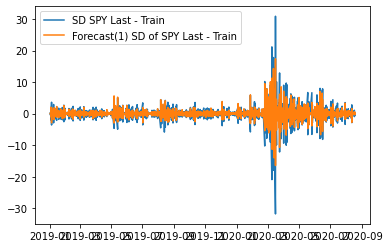

In [138]:
plt.plot(df_train_sd['SPY_Last'], label='SD SPY Last - Train')
plt.plot(predict_arima_sd, label='Forecast(1) SD of SPY Last - Train')
# plt.plot(df_delta_1, label='Delta')
plt.legend()

In [139]:
from arch.univariate import ConstantMean, GARCH, Normal

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
predicted_undiff.dropna(inplace=True)

In [46]:
def get_prediction_accuracy(method, expected, predicted):
    if method == 'MSE':
        accuracy = mean_squared_error(expected, predicted)
        return {method:accuracy}
    elif method == 'MAE':
        accuracy = mean_absolute_error(expected, predicted)
        return {method:accuracy}
#     else:
#         accuracy = mean_absolute_error(expected, predicted)
#         return {method:accuracy}

In [53]:
var_3_fitted.coefs[2][0][0]

-0.21613722966483417

- Consider ARIMA and GARCH?
- VIX vs no VIX
- VAR(p) where p = 1 to 5? Determine parsimony (elbow) rule
- Train vs test dataset
- Forecast(1) vs Forecast(up to 5)

In [63]:
predicted_1_undiff = 2*df['SPY_Last'].shift(1) - df['SPY_Last'].shift(2) + predicted_1
predicted_2_undiff = 2*df['SPY_Last'].shift(1) - df['SPY_Last'].shift(2) + predicted_2
predicted_3_undiff = 2*df['SPY_Last'].shift(1) - df['SPY_Last'].shift(2) + predicted_3

In [ ]:
preds = [predicted_1_undiff.dropna(), predicted_2_undiff.dropna(), predicted_3_undiff.dropna()]
for i in range(0, len(preds)):
    print (get_prediction_accuracy('MSE', df['SPY_Last'][3+i:], preds[i]))
    print (get_prediction_accuracy('MAE', df['SPY_Last'][3+i:], preds[i]))
#     print (get_prediction_accuracy('MAPE', df['SPY_Last'][3+i:], preds[i]))

In [ ]:
print(get_prediction_accuracy('MSE', df['SPY_Last'][3:], predicted_undiff))

In [ ]:
predicted_1

In [18]:
# predicted_2 = -0.651446*df_train_l2['SPY_Last_1'] + 0.058218*df_train_l2['VIX_Last_1'] -\
# 0.311987*df_train_l2['SPY_Last_2'] + 0.081197*df_train_l2['VIX_Last_2']
predicted_1 = -0.478858*df_lagged['SPY_Last'] + 0.094456*df_lagged['VIX_Last']

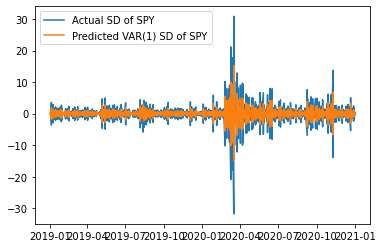

In [19]:
plt.plot(df_second['SPY_Last'], label='Actual SD of SPY')
plt.plot(predicted_1, label='Predicted VAR(1) SD of SPY')
plt.legend()

In [20]:
def rebuild_diffed_get_fd(series, previous_series):
    cumsum = series.cumsum()
    undiff = cumsum.fillna(0) + previous_series.iloc[0]
    return previous_series.head(2).append(undiff)
def rebuild_diffed_get_undiff(series, previous_series):
    cumsum = series.cumsum()
    undiff = cumsum.fillna(0) + previous_series.iloc[0]
    return previous_series.head(1).append(undiff)
# assert rebuild_diffed(df_log_returns_no_vol_fd, df_log_returns_no_vol).equals(df_log_returns_no_vol)
# rebuild_diffed(rebuild_diffed(df_log_returns_no_vol_fd, df_log_returns_no_vol), df_original)

In [21]:
p_fd = rebuild_diffed_get_fd(predicted_1, df_first['SPY_Last'])

In [22]:
p_undiff = rebuild_diffed_get_undiff(p_fd, df['SPY_Last'])

In [23]:
df_first_spy = pd.DataFrame(df_first['SPY_Last'])
p_fd = pd.DataFrame(p_fd)

In [25]:
df_first_comp = df_first_spy.join(p_fd)
df_first_comp.rename(columns={0:'SPY_Last_Pred'}, inplace=True)

In [26]:
df_first_comp['Delta'] = df_first_comp['SPY_Last'] - df_first_comp['SPY_Last_Pred']

Agenda for April 11, 2021:
-    Transformation to check prediction. 
-   Plot the actual and predicted using the test data.
-   We can move on to trading strategies.

For transformation of second-differenced dataset back to the original dataset, all I need to know are the times and first or last two observations of the original dataset. 
BUT BEWARE, DO NOT TRY TO PREDICT 600 THOUSAND PERIODS FORWARD. TRY TO PREDICT 1-2 PERIODS FORWARD AT A TIME.

In [37]:
246.4420+0.062+0.0471

246.55110000000002

In [ ]:
#var_1_fitted.forecast(np.array([0,0]),3)
df_second

In [ ]:
lags = var_1_fitted.k_ar

In [ ]:
df_second.values[3:4]

In [ ]:
var_1_fitted.forecast(df_second.values[:1],1)

In [ ]:
future_obs = 1

In [ ]:
df_second.iat[1,0]

In [ ]:
df_second['SPY_Last'].iloc[1] 

In [ ]:
var_1_fitted.forecast(df_second.values[:2],1)

In [ ]:
df_sc.iloc[1] = var_1_fitted.forecast(df_second.values[:2],1)

In [ ]:
len(df_sc)

In [ ]:
var_1_fitted.forecast??

In [ ]:
var_1_fitted.endog[1]

In [ ]:
results.forecast(df_second.values[3:600], steps=1)

In [ ]:
df_second.values[3:4]

In [ ]:
# forecasting
# pred = results.forecast(results.y, steps=nobs)
# df_forecast = pd.DataFrame(pred, index=df.index[-nobs:], columns=df.columns + '_1d')
# df_forecast.tail()# inverting transformation
# def invert_transformation(df_train, df_forecast, second_diff=False):
#     """Revert back the differencing to get the forecast to original scale."""
#     df_fc = df_forecast.copy()
#     columns = df_train.columns
#     for col in columns:        
#         # Roll back 2nd Diff
#         if second_diff:
#             df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
#         # Roll back 1st Diff
#         df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
#     return df_fc# show inverted results in a dataframe
# df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
# df_results.loc[:, ['realgdp_forecast', 'realcons_forecast']]

In [ ]:
# VAR(1)
df_sc = df_second.copy()
for i in range(1,len(df_second)-1):
#     var_1_fitted.forecast(df_second.values[i-future_obs:i],1)
    df_sc.iloc[i+1] = var_1_fitted.forecast(df_second.values[i-future_obs:i],1)

In [ ]:
df_second.values[0:1]

In [ ]:
results.forecast(df_second.values[0:100],1)

In [ ]:
# VAR(100)
df_sc_100 = df_second.copy()
for i in range(100,len(df_second)-1):
#     var_1_fitted.forecast(df_second.values[i-future_obs:i],1)
    df_sc_100.iloc[i+1] = results.forecast(df_second.values[0:i],1)

In [ ]:
def revert_transformation(df_train, df_forecast):
    df_fc = df_forecast.copy()
    for col in df_train.columns:
        df_fc[str(col)+'_1d'] = 2*df_train[col].shift(1) - df_train[col].shift(2) + df_fc[col]
    return df_fc

In [ ]:
df_var_1 = revert_transformation(df, df_sc)

In [ ]:
df_var_100 = revert_transformation(df, df_sc_100)

In [ ]:
df_var_1

In [ ]:
df_var_100

In [ ]:
plt.plot(df['SPY_Last'], label='Actual SPY Last')
plt.plot(predicted_undiff, label='Forecast(1)-Manual of SPY Last')
plt.plot(df_var_1['SPY_Last_1d'], label='Forecast(1)-MSE of SPY Last')
plt.plot(df_var_100['SPY_Last_1d'], label='Forecast(100)-MSE of SPY Last')
# plt.plot(df_delta_1, label='Delta')
plt.legend()

In [ ]:
'''Here is a comparison of the various VAR(p) predictions. We have decided to abandon the forecast function 
and instead we will manually derive the predicted level datasets.'''
# Manual
preds = [predicted_1_undiff.dropna(), predicted_2_undiff.dropna(), predicted_3_undiff.dropna()]
for i in range(0, len(preds)):
    print (get_prediction_accuracy('MSE', df['SPY_Last'][3+i:], preds[i]))
    print (get_prediction_accuracy('MAE', df['SPY_Last'][3+i:], preds[i]))

# Forecast function
print (get_prediction_accuracy('MSE', df['SPY_Last'][2:], df_var_1['SPY_Last_1d'].dropna()))
print (get_prediction_accuracy('MAE', df['SPY_Last'][2:], df_var_1['SPY_Last_1d'].dropna()))
# Forecast function
print (get_prediction_accuracy('MSE', df['SPY_Last'][2:], df_var_100['SPY_Last_1d'].dropna()))
print (get_prediction_accuracy('MAE', df['SPY_Last'][2:], df_var_100['SPY_Last_1d'].dropna()))